<a href="https://colab.research.google.com/github/ariel07-sw/applied-data-in-econ/blob/main/In_class_note_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np

In [6]:
np.random.randint(60,101)

79

In [7]:
grades = np.concatenate([np.random.randint(60,75,40),np.random.randint(75,85,100),np.random.randint(85,101,60)])
grades

array([ 62,  66,  72,  70,  68,  71,  73,  71,  65,  71,  72,  67,  64,
        72,  60,  64,  64,  73,  68,  74,  71,  69,  73,  74,  62,  67,
        68,  64,  74,  74,  71,  73,  69,  63,  67,  66,  67,  70,  64,
        72,  83,  83,  79,  82,  79,  78,  84,  80,  84,  75,  82,  83,
        77,  84,  79,  84,  84,  84,  78,  78,  80,  76,  82,  78,  79,
        76,  78,  84,  76,  79,  84,  77,  80,  77,  80,  83,  77,  84,
        76,  80,  84,  79,  79,  83,  81,  80,  75,  82,  82,  80,  80,
        81,  83,  82,  77,  83,  80,  83,  81,  83,  78,  81,  78,  76,
        81,  81,  82,  83,  84,  77,  78,  79,  82,  76,  83,  80,  78,
        80,  83,  80,  82,  76,  82,  75,  81,  77,  79,  79,  80,  82,
        79,  82,  76,  82,  77,  81,  83,  77,  80,  78,  99,  85,  88,
        97,  98,  85,  91,  91,  87,  92,  88,  95,  92,  96,  88,  88,
        85, 100,  93,  98, 100,  98, 100,  87,  92,  95,  98,  87,  85,
        93,  99,  98,  87,  85,  93,  90,  93,  86,  89,  87,  9

In [8]:
import pandas as pd

df = pd.DataFrame(grades,columns=['grades'])
pop_mean = df['grades'].mean()
print("Poplulation Mean:",pop_mean)
df.describe()

Poplulation Mean: 81.34


,grades
count,200.000000
mean,81.340000
std,8.945081
min,60.000000
25%,76.000000
50%,81.000000
75%,87.000000
max,100.000000


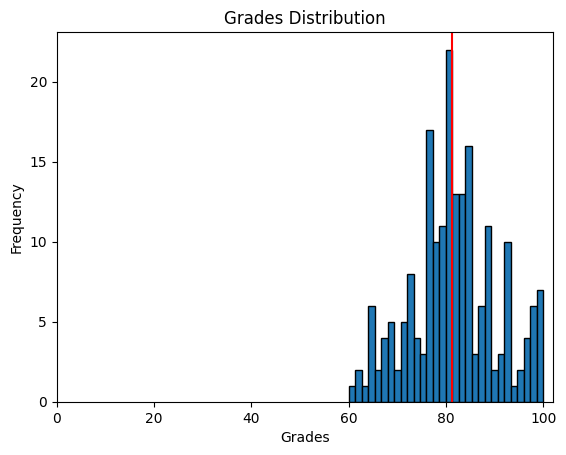

In [9]:
import matplotlib.pyplot as plt
plt.hist(df, bins = 30, edgecolor = 'k')
plt.axvline(pop_mean, color = 'red')
plt.title("Grades Distribution")
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.xlim(xmin=0)
plt.show()

In [10]:
sample_3 = df['grades'].sample(n=3, replace = True)
print(sample_3)
print("Sample Mean:",sample_3.mean())
Sampling_error_3 = sample_3.mean() - pop_mean
print("Sampling Error:",Sampling_error_3)

70     84
85     80
154    88
Name: grades, dtype: int64
Sample Mean: 84.0
Sampling Error: 2.6599999999999966


In [11]:
biased_pool = df[df['grades'] > 80]

In [12]:
sample_biased_3 = biased_pool['grades'].sample(n=3, replace = True, weights=df['grades'] )
print(sample_biased_3)
print("Biased Sample Mean:",sample_biased_3.mean())
Sampling_error_biased_3 = sample_biased_3.mean() - pop_mean
print("Biased Sampling Error:",Sampling_error_biased_3)

129    82
131    82
147    91
Name: grades, dtype: int64
Biased Sample Mean: 85.0
Biased Sampling Error: 3.6599999999999966


In [13]:
sample_mean =[]

       grades_sample_mean
count         1000.000000
mean            81.369100
std              1.632189
min             76.066667
25%             80.300000
50%             81.333333
75%             82.466667
max             86.233333


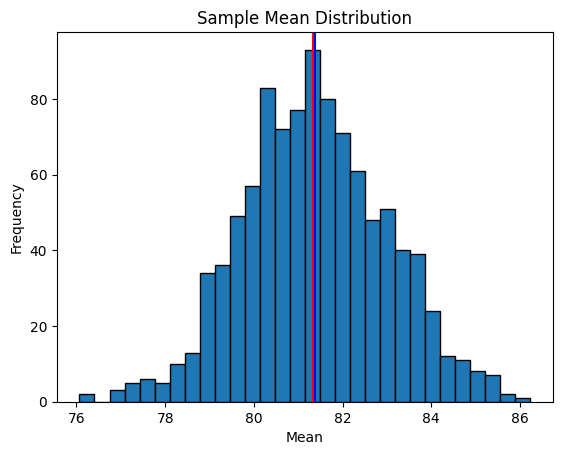

In [14]:
for i in range(1000):
  sample = df['grades'].sample(n=30, replace = True)
  sample_mean.append(sample.mean())

df_sample_mean = pd.DataFrame(sample_mean,columns=['grades_sample_mean'])

print("="*80)
print(df_sample_mean.describe())
print("="*80)
plt.hist(df_sample_mean['grades_sample_mean'], bins = 30, edgecolor = 'k')
plt.title("Sample Mean Distribution")
plt.axvline(pop_mean, color = 'red')
plt.axvline(df_sample_mean['grades_sample_mean'].mean(), color = 'blue')
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.show()

# **With a known population mean and standard deviation.**

In [15]:
s_e_sample_3_1k = df.std() / np.sqrt(3)
print(s_e_sample_3_1k)

grades    5.164445
dtype: float64


In [16]:
s_e_sample_30_1k = df.std() / np.sqrt(30)
print(s_e_sample_30_1k)

grades    1.633141
dtype: float64


In [17]:
m_e = 1.96 * s_e_sample_30_1k
m_e

,0
grades,3.200956


In [18]:
upper_bound = df_sample_mean['grades_sample_mean'].mean() + 1.96*s_e_sample_30_1k
upper_bound

,0
grades,84.570056


In [19]:
lower_bound = df_sample_mean['grades_sample_mean'].mean() - 1.96*s_e_sample_30_1k
lower_bound

,0
grades,78.168144


In [20]:
C_I_95 = [f"{lower_bound['grades']:.2f}",f"{upper_bound['grades']:.2f}"]
print(C_I_95)

['78.17', '84.57']


In [21]:
import scipy.stats as stats

In [23]:
ci= stats.norm.interval(0.95,loc=df_sample_mean['grades_sample_mean'].mean(),scale=s_e_sample_30_1k)

In [24]:
ci

(array([78.16820273]), array([84.56999727]))

N=30,but only 1 study

In [28]:
sample_30=df['grades'].sample(n=30,replace=True)
print (sample_30.mean())

82.8


In [29]:
z_score=(sample_30.mean()-pop_mean)/(df.std()/np.sqrt(30))
z_score


,0
grades,0.893983


In [30]:
p_value=stats.norm.sf(z_score)*2
p_value

array([0.37133104])

In [31]:
#set up
null_mean=35.00
sample_mean=25.53
n_pro=203
std_dev=8.5

In [32]:
#sim
np.random.seed(41)
pop_size=100000
pop_data=np.random.normal(null_mean,std_dev,pop_size)
pop_sample=np.random.normal(sample_mean,std_dev,n_pro)

In [35]:
t_stat,p_val=stats.ttest_1samp(pop_sample,null_mean)
print("T-score",t_stat)
print(f"p-value,{p_val:.20f}")
if p_val<0.05:
  print("Reject Null Hypothesis")
if p_val>0.05:
   print("Accept Null Hypothesis")

T-score -15.67236131632247
p-value,0.00000000000000000000
Reject Null Hypothesis


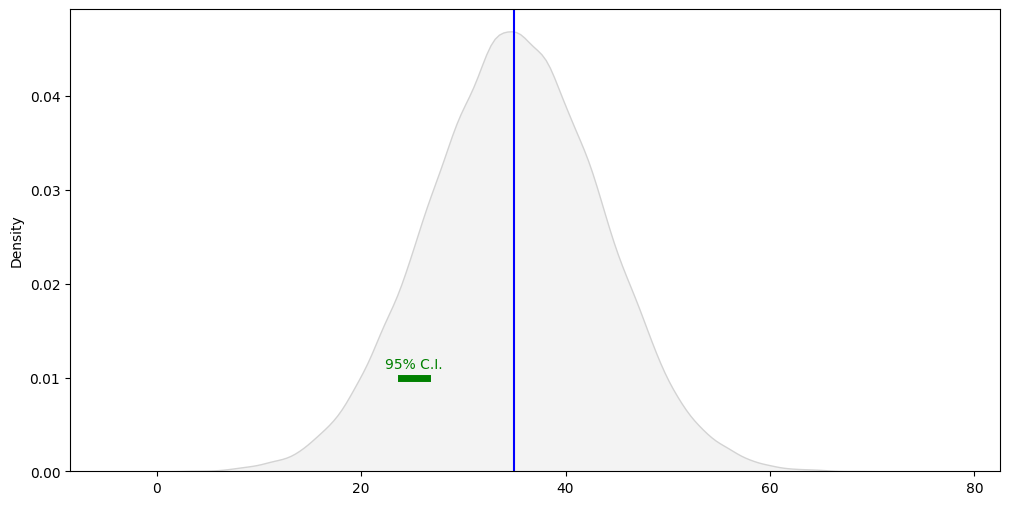

In [51]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.kdeplot(pop_data,fill=True,color='lightgrey',label='popupation')
plt.axvline(null_mean,color='blue',label='population Mean')

plt.plot([ci_low,ci_high],[0.01,0.01],color='green',linewidth=5,label="95% C.I.")
plt.text((ci_low + ci_high)/2,0.011,"95% C.I.",color='green',ha='center')
plt.show()

In [42]:
ci_low,ci_high=stats.t.interval(0.95,df=len(pop_sample)-1,
                                       loc=np.mean(pop_sample),
                                            scale=stats.sem(pop_sample))

In [43]:
ci_low

np.float64(23.92497018635446)

In [44]:
ci_high

np.float64(26.40029569712505)

Text(25.162632941739755, 0.01, '95%')

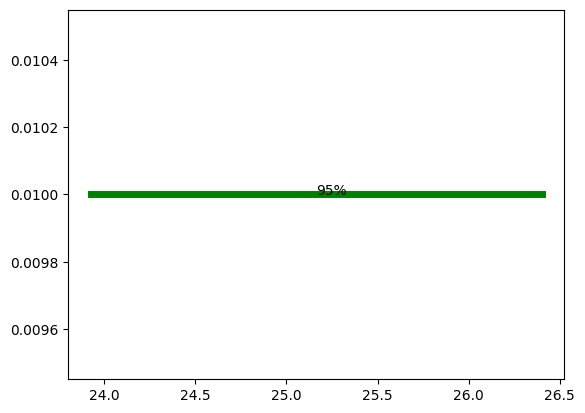

In [50]:
plt.plot([ci_low,ci_high],[0.01,0.01],color='green',linewidth=5,label="95% C.I.")
plt.text((ci_low + ci_high)/2,0.01,"95%")

In [54]:
#load data
df_salon=pd.read_excel('hair_salon_transactions.xlsx')
df_salon

,Salon,Gender,Price
0,Newbury Street Salon,Female,48.04
1,Fenway Barbers,Female,32.14
2,South End Studio,Male,43.93
3,Beacon Hill Salon,Female,48.55
4,Roxbury Cuts,Female,69.27
...,...,...,...
4195,Northeastern Salon,Male,59.97
4196,Back Bay Hair,Female,56.53
4197,Chinatown Barber,Male,37.42
4198,Great Clips,Female,27.78


In [56]:
salon_diff_price=df_salon.groupby(['Salon','Gender'])['Price'].mean().unstack()
salon_diff_price=(["Difference"])['Price'].mean().unstack()
salon_diff_price

Gender,Female,Male
Salon,,
Back Bay Hair,57.381031,42.304103
Beacon Hill Salon,49.095982,48.834872
Boston Barber,44.092692,33.879310
Cambridge Cuts,52.908598,43.103030
Campus Cuts,34.951789,30.097629
Chinatown Barber,47.760673,43.175638
Downtown Cuts,23.962182,21.113363
Fenway Barbers,32.832396,29.846639
Floyd's 99,39.889223,37.758365


In [59]:
df_mobility=pd.read_excel('immigrant_mobility_study.xlsx')
df_mobility

,Pair_ID,Mother_Year,Mother_Zip,Mother_Pct,Daughter_Year,Daughter_Zip,Daughter_Pct
0,1,1970,95266,50.9,2000,94258,50.7
1,2,1970,91548,39.5,2000,92740,67.6
2,3,1970,94019,53.7,2000,90979,62.4
3,4,1970,94205,69.4,2000,90518,80.7
4,5,1970,91369,37.8,2000,94994,12.8
...,...,...,...,...,...,...,...
4116,4117,1970,91113,37.6,2000,92790,15.4
4117,4118,1970,91292,8.0,2000,94262,53.1
4118,4119,1970,91162,33.8,2000,92253,12.2
4119,4120,1970,91030,23.3,2000,94974,32.1
